In [89]:
from statsbombpy import sb
import pandas as pd 
import matplotlib.pyplot as plt
from mplsoccer import  VerticalPitch, Pitch
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
from shapely.ops import clip_by_rect
from shapely.geometry import Polygon, Point, LineString
from shapely.ops import unary_union



In [90]:
copaamerica = sb.matches(competition_id= 223, season_id=282).sort_values(by='match_date')
copaamerica

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
31,3939969,2024-06-21,03:00:00.000,South America - Copa America,2024,Argentina,Canada,2,0,available,...,None,1,Group Stage,Mercedes-Benz Stadium,Jesús Valenzuela Sáez,Lionel Sebastián Scaloni,Jesse Marsch,1.1.0,2,2
30,3939970,2024-06-22,03:00:00.000,South America - Copa America,2024,Peru,Chile,0,0,available,...,None,1,Group Stage,AT&T Stadium,Wilton Pereira Sampaio,Jorge Daniel Fossati Lurachi,Ricardo Alberto Gareca Nardi,1.1.0,2,2
29,3939971,2024-06-23,04:00:00.000,South America - Copa America,2024,Mexico,Jamaica,1,0,available,...,None,1,Group Stage,NRG Stadium,Ismail Elfath,Jaime Arturo Lozano Espín,Heimir Hallgrímsson,1.1.0,2,2
28,3939972,2024-06-23,01:00:00.000,South America - Copa America,2024,Ecuador,Venezuela,1,2,available,...,None,1,Group Stage,Levi''s Stadium,Wilmar Alexander Roldán Pérez,Félix Sánchez Bas,Fernando Ariel Batista,1.1.0,2,2
27,3939974,2024-06-24,01:00:00.000,South America - Copa America,2024,United States,Bolivia,2,0,available,...,None,1,Group Stage,AT&T Stadium,Maurizio Mariani,Gregg Berhalter,Antônio Carlos Zago,1.1.0,2,2
7,3939973,2024-06-24,04:00:00.000,South America - Copa America,2024,Uruguay,Panama,3,1,available,...,None,1,Group Stage,Hard Rock Stadium,Piero Maza Gomez,Marcelo Alberto Bielsa Caldera,Thomas Christiansen Tarín,1.1.0,2,2
26,3939975,2024-06-25,01:00:00.000,South America - Copa America,2024,Colombia,Paraguay,2,1,available,...,None,1,Group Stage,NRG Stadium,Darío Herrera,Néstor Gabriel Lorenzo,Daniel Oscar Garnero,1.1.0,2,2
25,3939976,2024-06-25,04:00:00.000,South America - Copa America,2024,Brazil,Costa Rica,0,0,available,...,None,1,Group Stage,SoFi Stadium,César Arturo Ramos Palazuelos,Dorival Silvestre Júnior,Gustavo Julio Alfaro,1.1.0,2,2
23,3939978,2024-06-26,01:00:00.000,South America - Copa America,2024,Peru,Canada,0,1,available,...,None,2,Group Stage,Children''s Mercy Park,Mario Alberto Escobar Toca,Jorge Daniel Fossati Lurachi,Jesse Marsch,1.1.0,2,2
24,3939977,2024-06-26,04:00:00.000,South America - Copa America,2024,Chile,Argentina,0,1,available,...,None,2,Group Stage,MetLife Stadium,Andrés Matonte,Ricardo Alberto Gareca Nardi,Lionel Sebastián Scaloni,1.1.0,2,2


<p style="opacity: 0;">
    Queria dejar un espacio vacio y se me ocurrio escribir esto en transparente xd
</p>

<div style="font-size: 40px; font-family: Verdana;">
    ARGENTINA VS COLOMBIA
</div>

<p style="opacity: 0;">
    Queria dejar un espacio vacio y se me ocurrio escribir esto en transparente xd
</p>

In [91]:
partido = sb.events(match_id=3943077)
partido.player.value_counts()

player
Davinson Sánchez Mina              257
Jhon Adolfo Arias Andrade          224
Jefferson Andrés Lerma Solís       216
Enzo Fernandez                     212
Johan Andrés Mojica Palacio        204
James David Rodríguez Rubio        199
Rodrigo Javier De Paul             199
Alexis Mac Allister                196
Ángel Fabián Di María Hernández    193
Nicolás Alejandro Tagliafico       182
Carlos Eccehomo Cuesta Figueroa    182
Richard Rios Montoya               150
Santiago Arias Naranjo             146
Luis Fernando Díaz Marulanda       142
Lionel Andrés Messi Cuccittini     125
Cristian Gabriel Romero            118
Damián Emiliano Martínez           117
Camilo Andrés Vargas Gil           108
Julián Álvarez                      99
Lisandro Martínez                   99
Gonzalo Ariel Montiel               87
Juan Fernando Quintero Paniagua     87
Kevin Duvan Castaño Gil             86
Nicolás Iván González               73
Nahuel Molina Lucero                61
Jhon Andrés Córdob

SELECCIONANDO DATA PARA AHCER UN MAPA DE PASES DE ENZO FERNANDEZ 

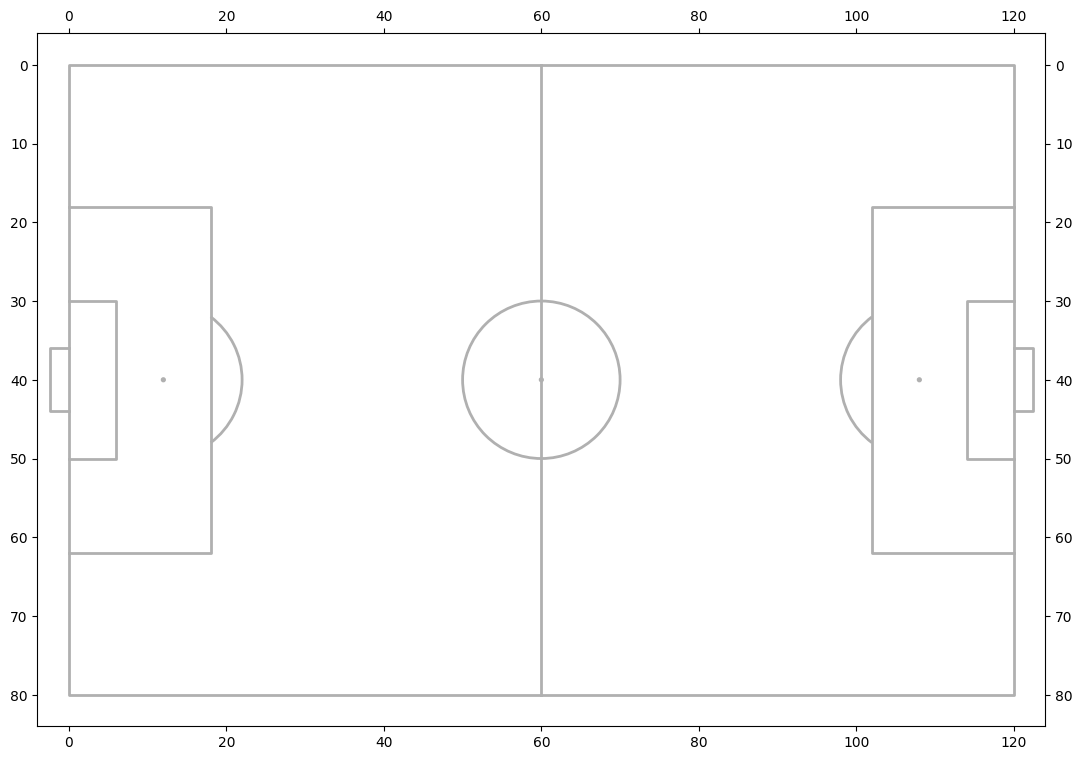

In [92]:
enzo = partido[partido['player'] == 'Enzo Fernandez' ]

fig, ax = plt.subplots(figsize=(16,9))
pitch = Pitch(
    pitch_type='statsbomb',
    axis=True,
    label=True,
    tick=True,
    goal_type='box'
)

pitch.draw(ax=ax)

In [93]:
pasesenzo = enzo[enzo['type'] == 'Pass']
pasesenzo[['x', 'y']] = pasesenzo.location.apply(pd.Series)
pasesenzo[['endx', 'endy']] = pasesenzo.pass_end_location.apply(pd.Series)
pasesenzo[['x','y','endx','endy']]

C:\Users\CHUCHO\AppData\Local\Temp\ipykernel_10328\2531227914.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pasesenzo[['x', 'y']] = pasesenzo.location.apply(pd.Series)
C:\Users\CHUCHO\AppData\Local\Temp\ipykernel_10328\2531227914.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pasesenzo[['x', 'y']] = pasesenzo.location.apply(pd.Series)
C:\Users\CHUCHO\AppData\Local\Temp\ipykernel_10328\2531227914.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

,x,y,endx,endy
11,48.6,41.0,45.6,54.5
18,54.1,50.6,72.2,55.0
47,46.9,53.6,48.6,72.2
52,37.6,25.9,40.7,13.3
54,29.9,22.4,7.2,44.2
...,...,...,...,...
900,75.1,49.0,82.7,70.5
902,99.5,45.2,98.5,22.9
934,33.8,28.7,22.7,48.2
936,47.9,38.8,48.3,56.0


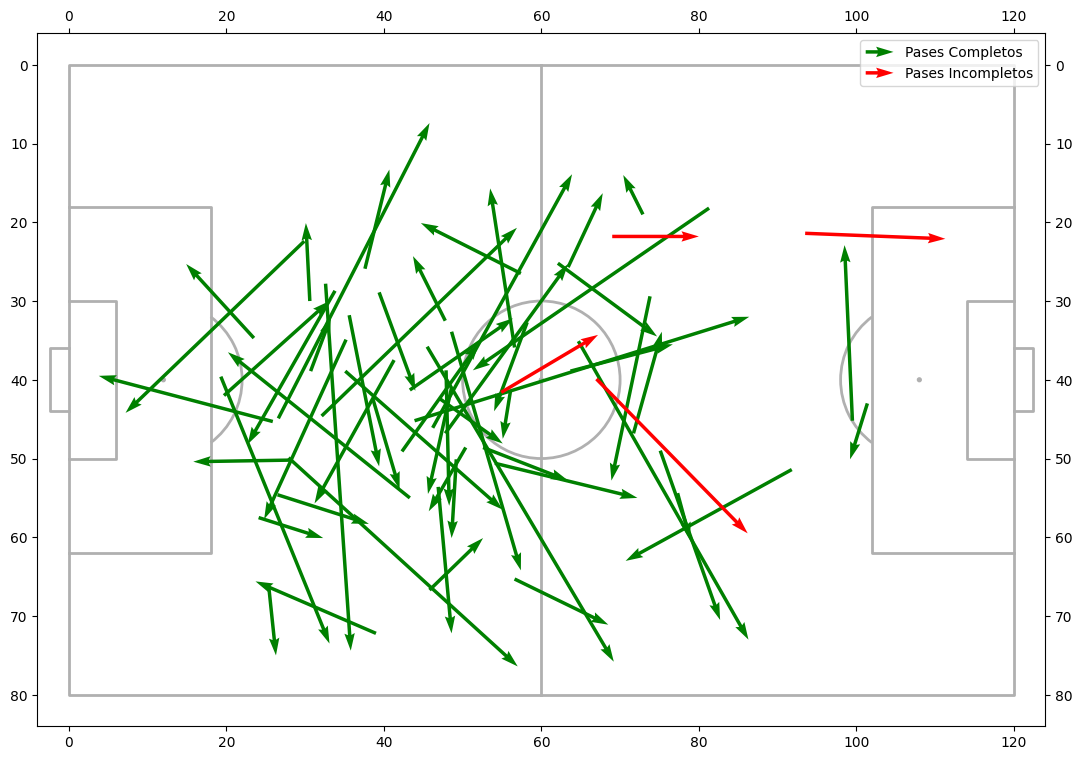

In [94]:
fig, ax = plt.subplots(figsize=(16,9))
pitch = Pitch(
    pitch_type='statsbomb',
    axis=True,
    label=True,
    tick=True,
    goal_type='box'
)

pitch.draw(ax=ax)

pases_completos = pasesenzo[~pasesenzo['pass_outcome'].isin(['Incomplete', 'Pass Offside'])]
pases_incompletos = pasesenzo[pasesenzo['pass_outcome'].isin(['Incomplete', 'Pass Offside'])]

pitch.arrows(pases_completos['x'], pases_completos['y'], pases_completos['endx'], pases_completos['endy'], ax=ax, label='Pases Completos', color='green', width=2.5 )
pitch.arrows(pases_incompletos['x'], pases_incompletos['y'], pases_incompletos['endx'], pases_incompletos['endy'], ax=ax, label='Pases Incompletos', color='red', width=2.5 )

plt.legend()

<p style="opacity: 0;">
    Queria dejar un espacio vacio y se me ocurrio escribir esto en transparente xd
</p>



<div style="font-size: 40px; font-family: Verdana;">
    MAPA DE TIROS DE ARGENTINA
</div>

<p style="opacity: 0;">
    Queria dejar un espacio vacio y se me ocurrio escribir esto en transparente xd
</p>

In [95]:
copaamerica_ids = list(copaamerica[(copaamerica['home_team'] == 'Argentina') | (copaamerica['away_team'] == 'Argentina')].match_id.values)

tiros = pd.DataFrame()
for i in copaamerica_ids:
    df = sb.events(match_id=i)
    df = df[df['type'] == 'Shot']
    tiros = pd.concat([tiros, df], ignore_index=True)


In [96]:
tiros[['x', 'y']] = tiros.location.apply(pd.Series)
tiros[['x', 'y', 'location']]

C:\Users\CHUCHO\AppData\Local\Temp\ipykernel_10328\1331536050.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tiros[['x', 'y']] = tiros.location.apply(pd.Series)
C:\Users\CHUCHO\AppData\Local\Temp\ipykernel_10328\1331536050.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tiros[['x', 'y']] = tiros.location.apply(pd.Series)


,x,y,location
0,98.9,28.3,"[98.9, 28.3]"
1,107.0,23.2,"[107.0, 23.2]"
2,94.0,25.9,"[94.0, 25.9]"
3,103.8,30.0,"[103.8, 30.0]"
4,104.3,45.3,"[104.3, 45.3]"
...,...,...,...
144,108.5,27.6,"[108.5, 27.6]"
145,105.5,52.1,"[105.5, 52.1]"
146,87.6,49.0,"[87.6, 49.0]"
147,30.2,42.3,"[30.2, 42.3]"


In [97]:
tiros.possession_team.value_counts()

possession_team
Argentina    90
Colombia     19
Canada       18
Ecuador      13
Peru          6
Chile         3
Name: count, dtype: int64

In [98]:
tiros['shot_team'] = np.where(tiros['possession_team'] == 'Argentina', 'Argentina', 'No Argentina' )
tiros.shot_team.value_counts()

C:\Users\CHUCHO\AppData\Local\Temp\ipykernel_10328\1637426544.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tiros['shot_team'] = np.where(tiros['possession_team'] == 'Argentina', 'Argentina', 'No Argentina' )


shot_team
Argentina       90
No Argentina    59
Name: count, dtype: int64

In [99]:
tiros_Argentina = tiros[tiros['shot_team'] == 'Argentina' ]
tiros_Argentina.shape

(90, 109)

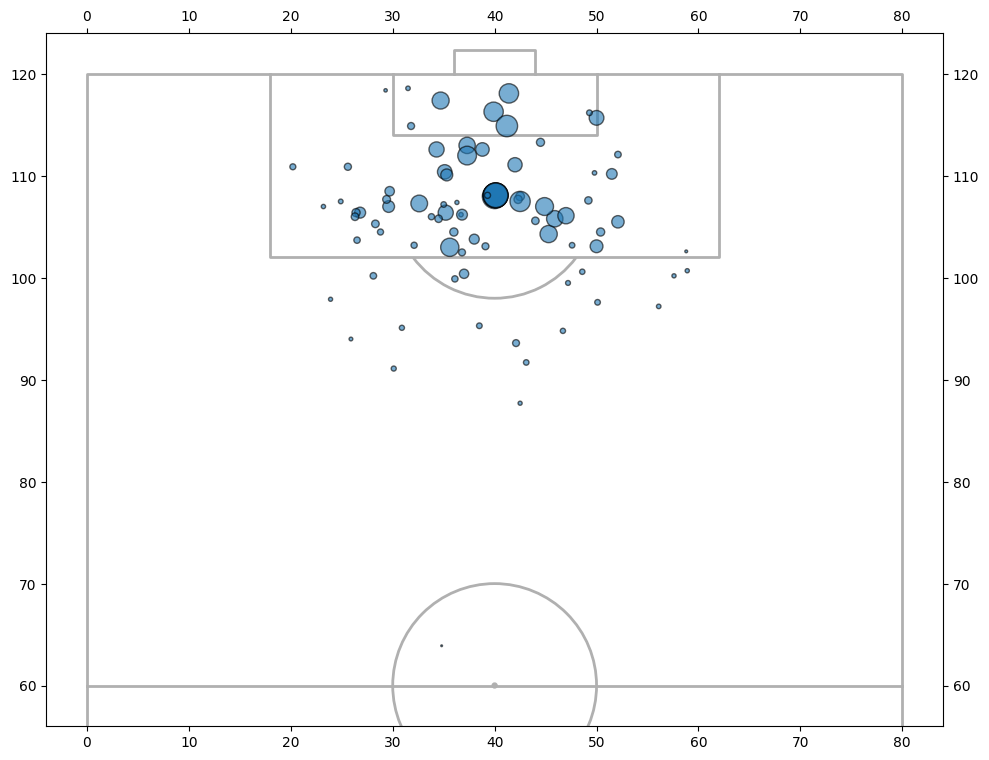

In [100]:
fig, ax = plt.subplots(figsize=(16,9))
pitch = VerticalPitch(
    pitch_type='statsbomb',
    axis=True,
    label=True,
    tick=True,
    goal_type='box',
    half=True,
    
)

pitch.draw(ax=ax)

pitch.scatter(tiros_Argentina.x, tiros_Argentina.y, ax=ax, s=tiros_Argentina.shot_statsbomb_xg*400 , alpha=.6, ec='black', label='Tiros' )
# s= (parametro que te permite agregar una nueva variable al grafico, en este caso los xg)
# alpha (transparencia, lo que ayuda a visualizar los pintos que se superponen)
# ec  (es para darle contorno al punto) 
# label (ademas de ser una etiqueta para mostrat en el propio grafico, funciona como en css, se puede filtrar por los labels)

In [101]:
tiros_Argentina.shot_outcome.value_counts()

shot_outcome
Off T            28
Saved            23
Blocked          18
Goal             13
Wayward           4
Post              3
Saved to Post     1
Name: count, dtype: int64

In [102]:
goles_Argentina = tiros_Argentina[tiros_Argentina.shot_outcome == 'Goal']
no_goles_Argentina = tiros_Argentina[tiros_Argentina.shot_outcome != 'Goal']
no_goles_Argentina.shape , goles_Argentina.shape

((77, 109), (13, 109))

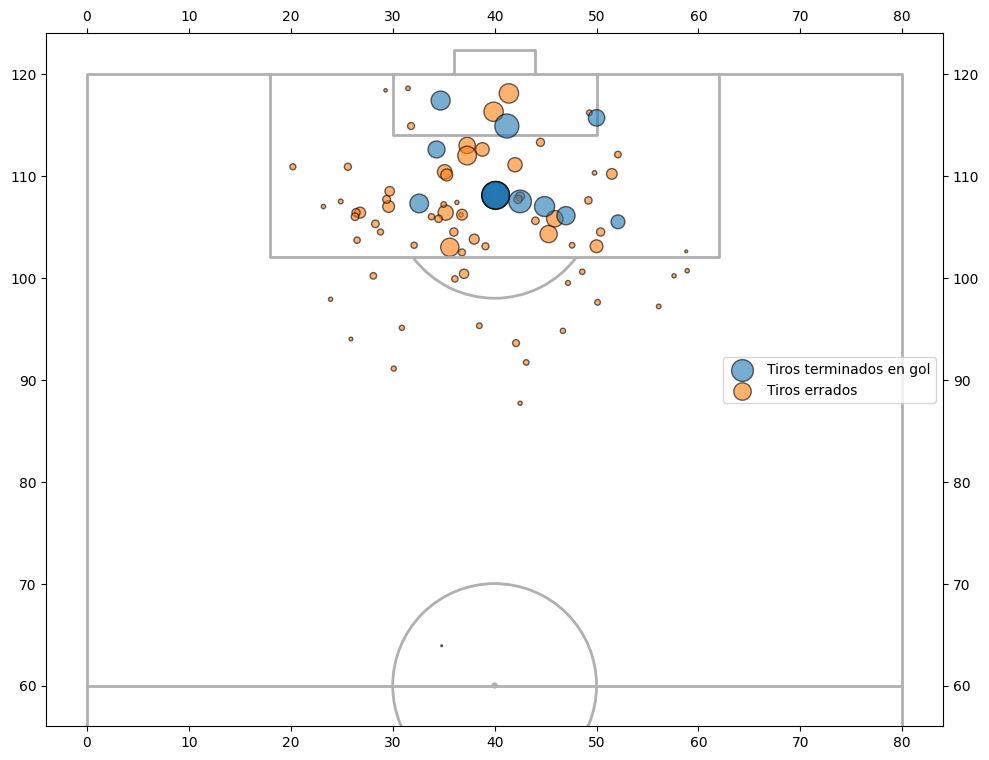

In [103]:
fig, ax = plt.subplots(figsize=(16,9))
pitch = VerticalPitch(
    pitch_type='statsbomb',
    axis=True,
    label=True,
    tick=True,
    goal_type='box',
    half=True,
    
)

pitch.draw(ax=ax)


pitch.scatter(goles_Argentina.x, goles_Argentina.y, ax=ax, s=goles_Argentina.shot_statsbomb_xg*500 , alpha=.6, ec='black', label='Tiros terminados en gol', zorder=.99 )
pitch.scatter(no_goles_Argentina.x, no_goles_Argentina.y, ax=ax, s=no_goles_Argentina.shot_statsbomb_xg*400 , alpha=.6, ec='black', label='Tiros errados', zorder=.0 )
#zorden (Orden en el eje Z, basicamente va de 0 a 1, dandole prioridad de visualizacion en la superposicion, siendo .99 los que estan mas arriba)

plt.legend()

Text(96, 70, '16.08 ')

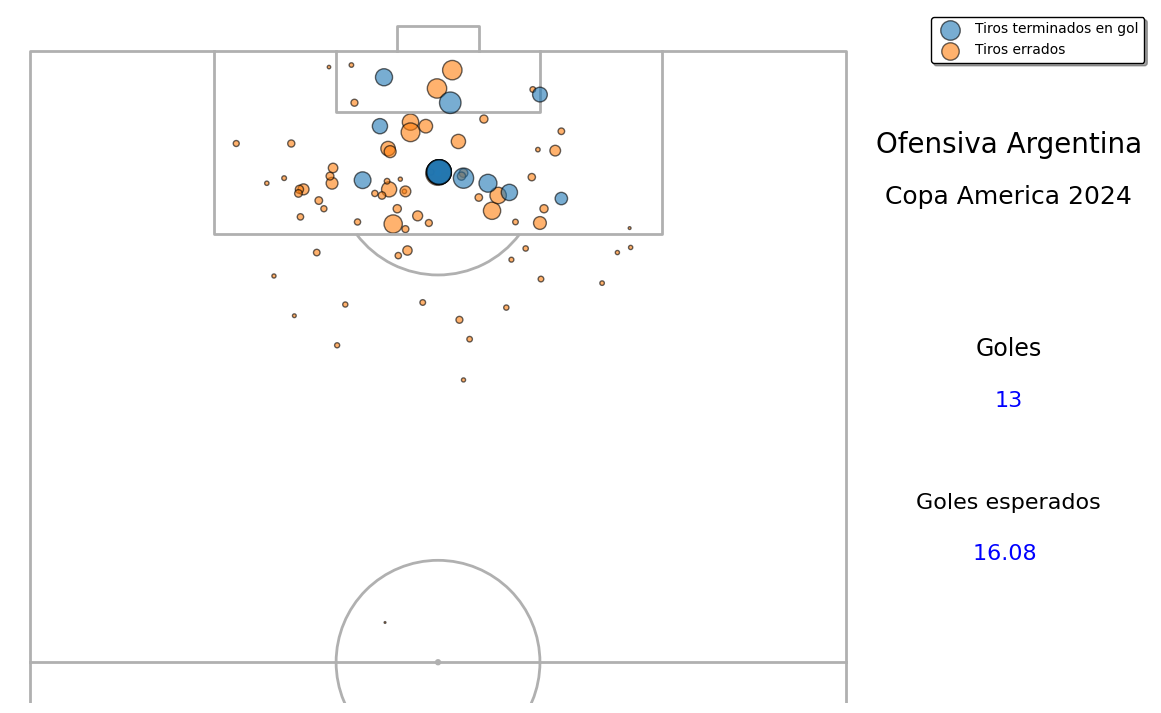

In [104]:
fig, ax = plt.subplots(figsize=(16,9))
pitch = VerticalPitch(
    pitch_type='statsbomb',
    goal_type='box',
    half=True,
    
)

pitch.draw(ax=ax)
plt.xlim(-2, 110)


pitch.scatter(goles_Argentina.x, goles_Argentina.y, ax=ax, s=goles_Argentina.shot_statsbomb_xg*400 , alpha=.6, ec='black', label='Tiros terminados en gol', zorder=.99 )
pitch.scatter(no_goles_Argentina.x, no_goles_Argentina.y, ax=ax, s=no_goles_Argentina.shot_statsbomb_xg*400 , alpha=.6, ec='black', label='Tiros errados', zorder=.0 )
#zorden (Orden en el eje Z, basicamente va de 0 a 1, dandole prioridad de visualizacion en la superposicion, siendo .99 los que estan mas arriba)

plt.legend(shadow=True, edgecolor= 'black')

disparos = tiros_Argentina.shape[0]
goles = goles_Argentina.shape[0]
xG_total = tiros_Argentina.shot_statsbomb_xg.sum()

ax.text(96, 110, 'Ofensiva Argentina', ha='center', fontsize=20) 
ax.text(96, 105, 'Copa America 2024', ha='center', fontsize=18) 
ax.text(96, 90, 'Goles', ha='center', fontsize=17)
ax.text(96, 85, f'{goles}', ha='center', fontsize=16, color='blue')
ax.text(96, 75, 'Goles esperados', ha='center', fontsize=16)
ax.text(96, 70, f'{round(xG_total,2)} ', ha='center', fontsize=16, color='blue' )

# round(xG_total,2) (Requiero que solo me muestre dos decimales)

<p style="opacity: 0;">
    Queria dejar un espacio vacio y se me ocurrio escribir esto en transparente xd
</p>

SE INTENTA HACER VORNOROI

<p style="opacity: 0;">
    Queria dejar un espacio vacio y se me ocurrio escribir esto en transparente xd
</p>

In [105]:
partido

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,...,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 442, 'lineup': [{'player': {'id'...",Argentina,779,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 41212, 'lineup': [{'player': {'i...",Colombia,769,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Colombia,769,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Argentina,779,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Colombia,769,00:00:00.000,Half Start,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Tactical,103.0,Jorge Andrés Carrascal Guardo,28723.0,NaN,Colombia,769,00:00:00.000,Substitution,NaN
4104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Tactical,103.0,Miguel Ángel Borja Hernández,6333.0,NaN,Colombia,769,00:00:00.000,Substitution,NaN
4105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Tactical,103.0,Andrés Mateus Uribe Villa,6193.0,NaN,Colombia,769,00:00:00.000,Substitution,NaN
4106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Tactical,103.0,Nicolás Hernán Otamendi,3090.0,NaN,Argentina,779,00:11:15.149,Substitution,NaN


In [106]:
partido[['x','y']] = partido['location'].apply(pd.Series)
partido[['endx','endy']] = partido['pass_end_location'].apply(pd.Series)

In [107]:
partido['pasador'] = partido['player']
partido['receptor'] = partido['player'].shift(-1)

#Se decinen las columnas pasador y receptor en el dataframe, pasador es la accion del player en dicho momento, y receptor es la accion siguiente del dataframe, pero con shift, 
#se mueve la columna y logramos que funcione como si fuese la accion posterior al pasador, siendo el receptor

In [108]:
partido.type.value_counts()
pases_partido = partido[(partido['type'] == 'Pass') & (partido['team'] == 'Argentina' )]
pases_partido.pass_outcome.value_counts()

pass_outcome
Incomplete      86
Out             14
Pass Offside     2
Unknown          2
Name: count, dtype: int64

In [109]:
pases_completados = pases_partido[pases_partido['pass_outcome'].isna() == True]

pases_completados[['player', 'location', 'pass_end_location']]


,player,location,pass_end_location
10,Lionel Andrés Messi Cuccittini,"[61.0, 40.1]","[51.0, 40.0]"
11,Enzo Fernandez,"[48.6, 41.0]","[45.6, 54.5]"
12,Rodrigo Javier De Paul,"[45.6, 54.5]","[31.1, 55.4]"
13,Cristian Gabriel Romero,"[32.6, 52.8]","[50.7, 6.2]"
14,Nicolás Alejandro Tagliafico,"[49.7, 6.4]","[27.0, 21.6]"
...,...,...,...
1136,Giovani Lo Celso,"[75.3, 42.7]","[99.2, 55.0]"
1151,Nicolás Alejandro Tagliafico,"[95.7, 0.1]","[116.2, 5.1]"
1183,Nicolás Alejandro Tagliafico,"[64.7, 15.1]","[94.0, 20.8]"
1191,Rodrigo Javier De Paul,"[23.0, 51.6]","[29.9, 47.8]"


In [110]:
pases_completados[['player','x','y','endx','endy']]

,player,x,y,endx,endy
10,Lionel Andrés Messi Cuccittini,61.0,40.1,51.0,40.0
11,Enzo Fernandez,48.6,41.0,45.6,54.5
12,Rodrigo Javier De Paul,45.6,54.5,31.1,55.4
13,Cristian Gabriel Romero,32.6,52.8,50.7,6.2
14,Nicolás Alejandro Tagliafico,49.7,6.4,27.0,21.6
...,...,...,...,...,...
1136,Giovani Lo Celso,75.3,42.7,99.2,55.0
1151,Nicolás Alejandro Tagliafico,95.7,0.1,116.2,5.1
1183,Nicolás Alejandro Tagliafico,64.7,15.1,94.0,20.8
1191,Rodrigo Javier De Paul,23.0,51.6,29.9,47.8


In [111]:
pases_completados.groupby('player')[['x','y']].mean()
#Se agrupo por jugador, teniendo en cuenta el promedio de la posicion inicial. Eso hace que sepamos el punto promedio en donde estuvo en la cancha

,x,y
player,,
Alexis Mac Allister,60.232727,28.572727
Cristian Gabriel Romero,38.157895,55.978947
Damián Emiliano Martínez,11.521212,40.593939
Enzo Fernandez,47.891667,41.651667
Giovani Lo Celso,46.685714,41.157143
Gonzalo Ariel Montiel,57.985714,70.752381
Julián Álvarez,65.930000,41.990000
Lautaro Javier Martínez,75.133333,49.800000
Leandro Daniel Paredes,50.200000,48.675000


In [112]:

partido[(partido['type'] == 'Substitution') & (partido['team'] == 'Argentina' )].minute

4095     65
4096     71
4100     96
4101     96
4102     96
4106    116
Name: minute, dtype: int64

In [113]:
primer_cambio = partido[(partido['type'] == 'Substitution') & (partido['team'] == 'Argentina' )].minute.min()
pases_completados = pases_completados[pases_completados['minute'] < primer_cambio ]

In [114]:
averange_location = pases_completados.groupby('player').agg({'x': ['mean'], 'y':['mean','count']})
#Se agrupa por jugador, y con .agg se agregan subcolumnas conrrespondientes a una columna existente, en este caso a la comuna x se le agrega una subcolumna promedio, y a la columna y se le agregan dos subcolumnas que son promedio y cantidad

averange_location.columns = ['x','y','count']
#Se modifica el nombre de las columnas, para que visualmente este mejor. Teniendo la posicion x promedio, la posicion y promedio, y la cantidad de pases que dio cada jugador


averange_location

,x,y,count
player,,,
Alexis Mac Allister,59.782222,29.988889,45
Cristian Gabriel Romero,38.617391,58.073913,23
Damián Emiliano Martínez,11.057143,41.266667,21
Enzo Fernandez,46.921277,41.838298,47
Gonzalo Ariel Montiel,58.800000,70.031579,19
Julián Álvarez,69.616667,40.233333,6
Lionel Andrés Messi Cuccittini,70.159259,41.540741,27
Lisandro Martínez,27.800000,24.595000,20
Nicolás Alejandro Tagliafico,55.267742,13.945161,31


In [115]:
MAX_MARKER_SIZE=600
averange_location['marker_size'] = (averange_location['count'] / averange_location['count'].max() * MAX_MARKER_SIZE)

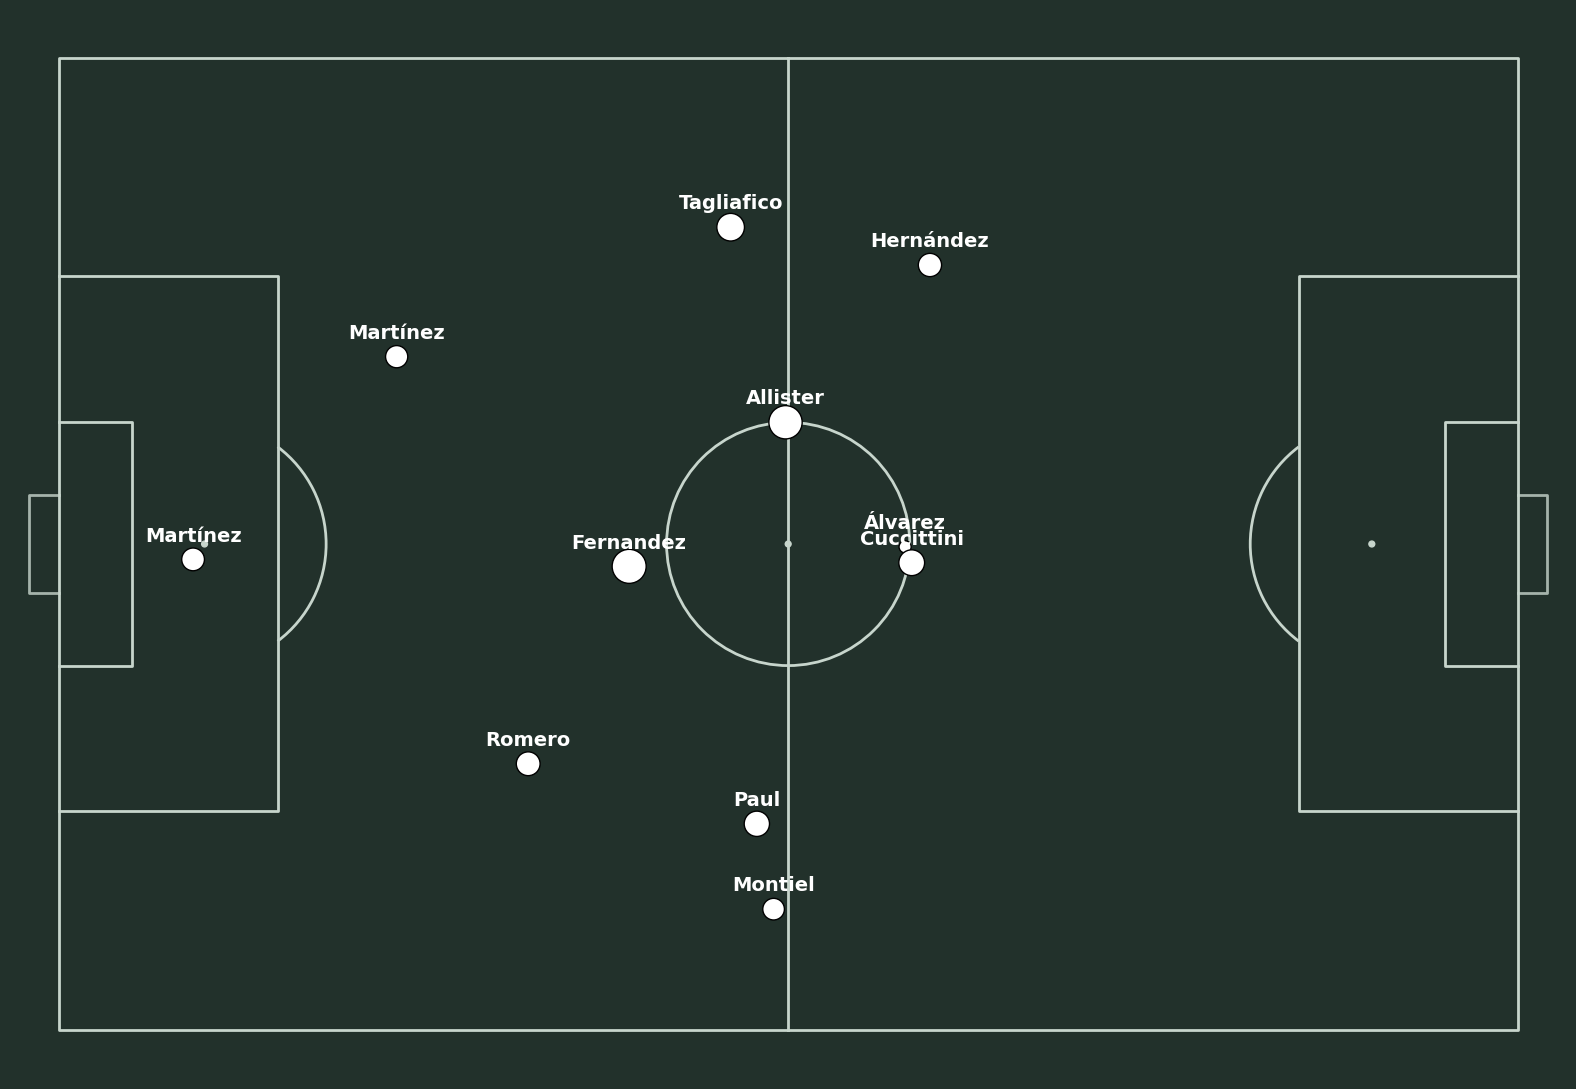

In [116]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc', goal_type='box', goal_alpha=.8)
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#22312b')

nodes = pitch.scatter(averange_location.x, averange_location.y, ax=ax, color='white', ec='black', s=averange_location['marker_size'])

for player, row in averange_location.iterrows():
    # Tomar el apellido o ajustar el texto si lo prefieres
    player_name = player.split(' ')[-1]  # Toma el apellido del jugador
    ax.annotate(player_name, xy=(row.x, row.y - 2), color='white', va='center', ha='center', size=14, weight='bold', zorder=1)

plt.show()

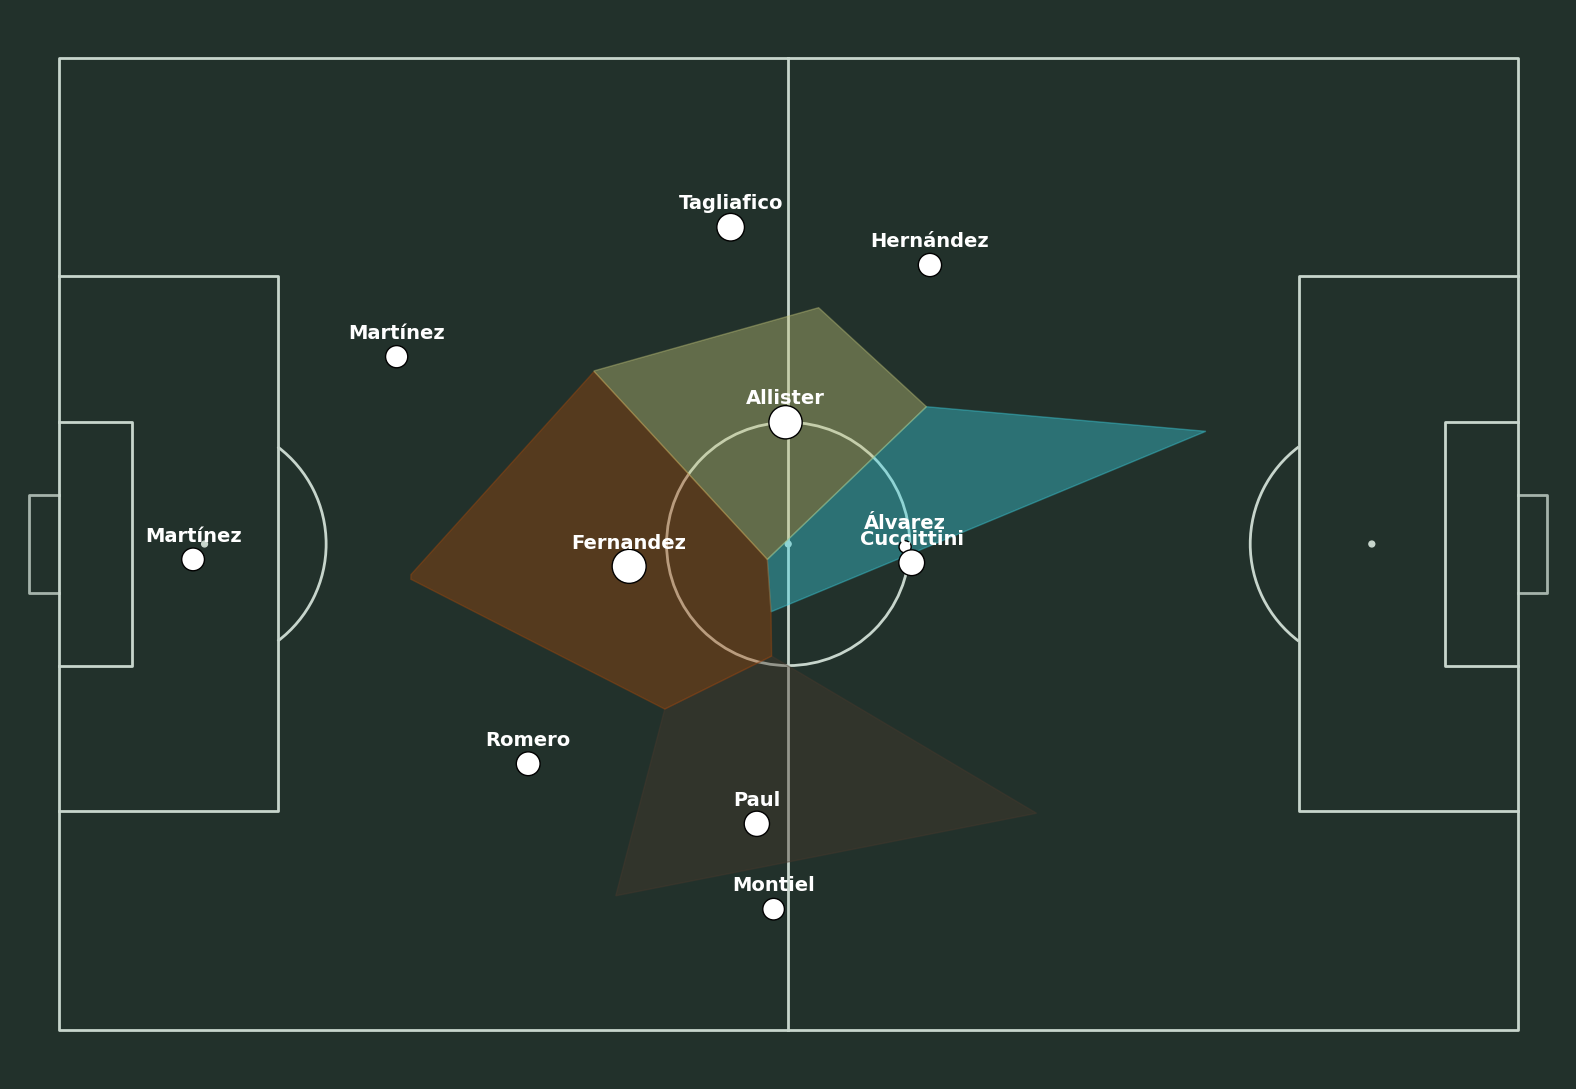

In [117]:
# Configurar la cancha
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc', goal_type='box', goal_alpha=.8)
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#22312b')

# Crear el diagrama de Voronoi
points = averange_location[['x', 'y']].values  # Extraemos las coordenadas (x, y)
vor = Voronoi(points)

# Plotear las celdas de Voronoi dentro de la cancha
for region in vor.regions:
    if not -1 in region and len(region) > 0:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon), edgecolor='white', alpha=0.4, color=np.random.rand(3,))  # Color aleatorio para cada celda

# Plotear los nodos de los jugadores
nodes = pitch.scatter(averange_location.x, averange_location.y, ax=ax, color='white', ec='black', s=averange_location['marker_size'])

# Añadir los nombres de los jugadores
for player, row in averange_location.iterrows():
    player_name = player.split(' ')[-1]  # Tomar el apellido del jugador
    ax.annotate(player_name, xy=(row.x, row.y - 2), color='white', va='center', ha='center', size=14, weight='bold', zorder=1)

plt.show()

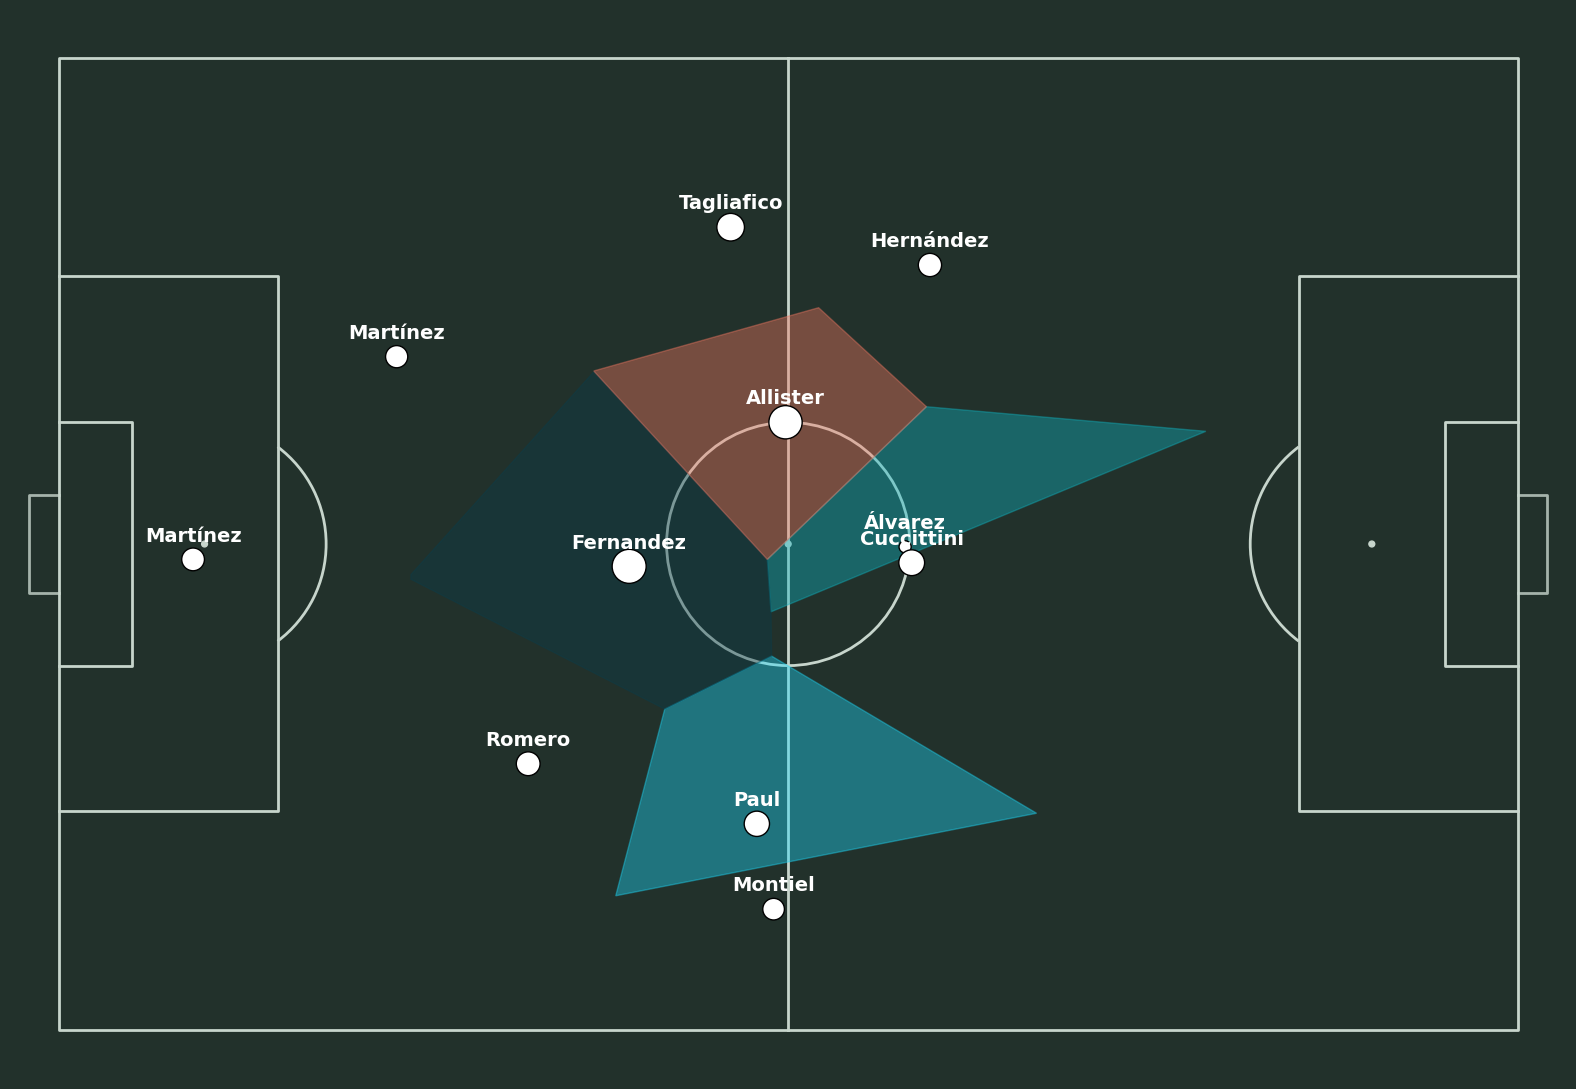

In [118]:
# Definir los límites de la cancha (StatsBomb)
pitch_xmin, pitch_xmax = 0, 120  # Dimensiones en el eje x
pitch_ymin, pitch_ymax = 0, 80   # Dimensiones en el eje y
pitch_bounds = Polygon([(pitch_xmin, pitch_ymin), (pitch_xmax, pitch_ymin), (pitch_xmax, pitch_ymax), (pitch_xmin, pitch_ymax)])

# Configurar la cancha
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc', goal_type='box', goal_alpha=.8)
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#22312b')

# Crear el diagrama de Voronoi
points = averange_location[['x', 'y']].values
vor = Voronoi(points)

# Función para recortar regiones de Voronoi a los límites de la cancha
def voronoi_finite_polygons_2d(vor, pitch_bounds):
    new_regions = []
    new_vertices = vor.vertices.tolist()

    # Mapear punto a cada región
    center = vor.points.mean(axis=0)
    radius = vor.points.ptp().max() * 1.5

    # Reemplazar regiones infinitas
    for region in vor.regions:
        if not region or -1 in region:
            continue

        # Obtener los vértices de la región
        vertices = [vor.vertices[i] for i in region]

        # Chequear si los vértices son finitos o no
        if all([0 <= vertex[0] <= 120 and 0 <= vertex[1] <= 80 for vertex in vertices]):
            new_regions.append(region)
        else:
            # Recortar región infinita
            region_polygon = Polygon(vertices)
            clipped_polygon = pitch_bounds.intersection(region_polygon)
            if clipped_polygon.is_empty:
                continue

            new_polygon_points = np.array(clipped_polygon.exterior.coords)
            new_region = []
            for point in new_polygon_points:
                if list(point) not in new_vertices:
                    new_vertices.append(list(point))
                new_region.append(new_vertices.index(list(point)))
            new_regions.append(new_region)

    return new_regions, np.asarray(new_vertices)

# Recortar las celdas de Voronoi para que se ajusten dentro de los límites de la cancha
regions, vertices = voronoi_finite_polygons_2d(vor, pitch_bounds)

# Plotear las celdas de Voronoi dentro de la cancha
for region in regions:
    polygon = vertices[region]
    plt.fill(*zip(*polygon), edgecolor='white', alpha=0.4, color=np.random.rand(3,))  # Color aleatorio para cada celda

# Plotear los nodos de los jugadores
nodes = pitch.scatter(averange_location.x, averange_location.y, ax=ax, color='white', ec='black', s=averange_location['marker_size'])

# Añadir los nombres de los jugadores
for player, row in averange_location.iterrows():
    player_name = player.split(' ')[-1]
    ax.annotate(player_name, xy=(row.x, row.y - 2), color='white', va='center', ha='center', size=14, weight='bold', zorder=1)

plt.show()

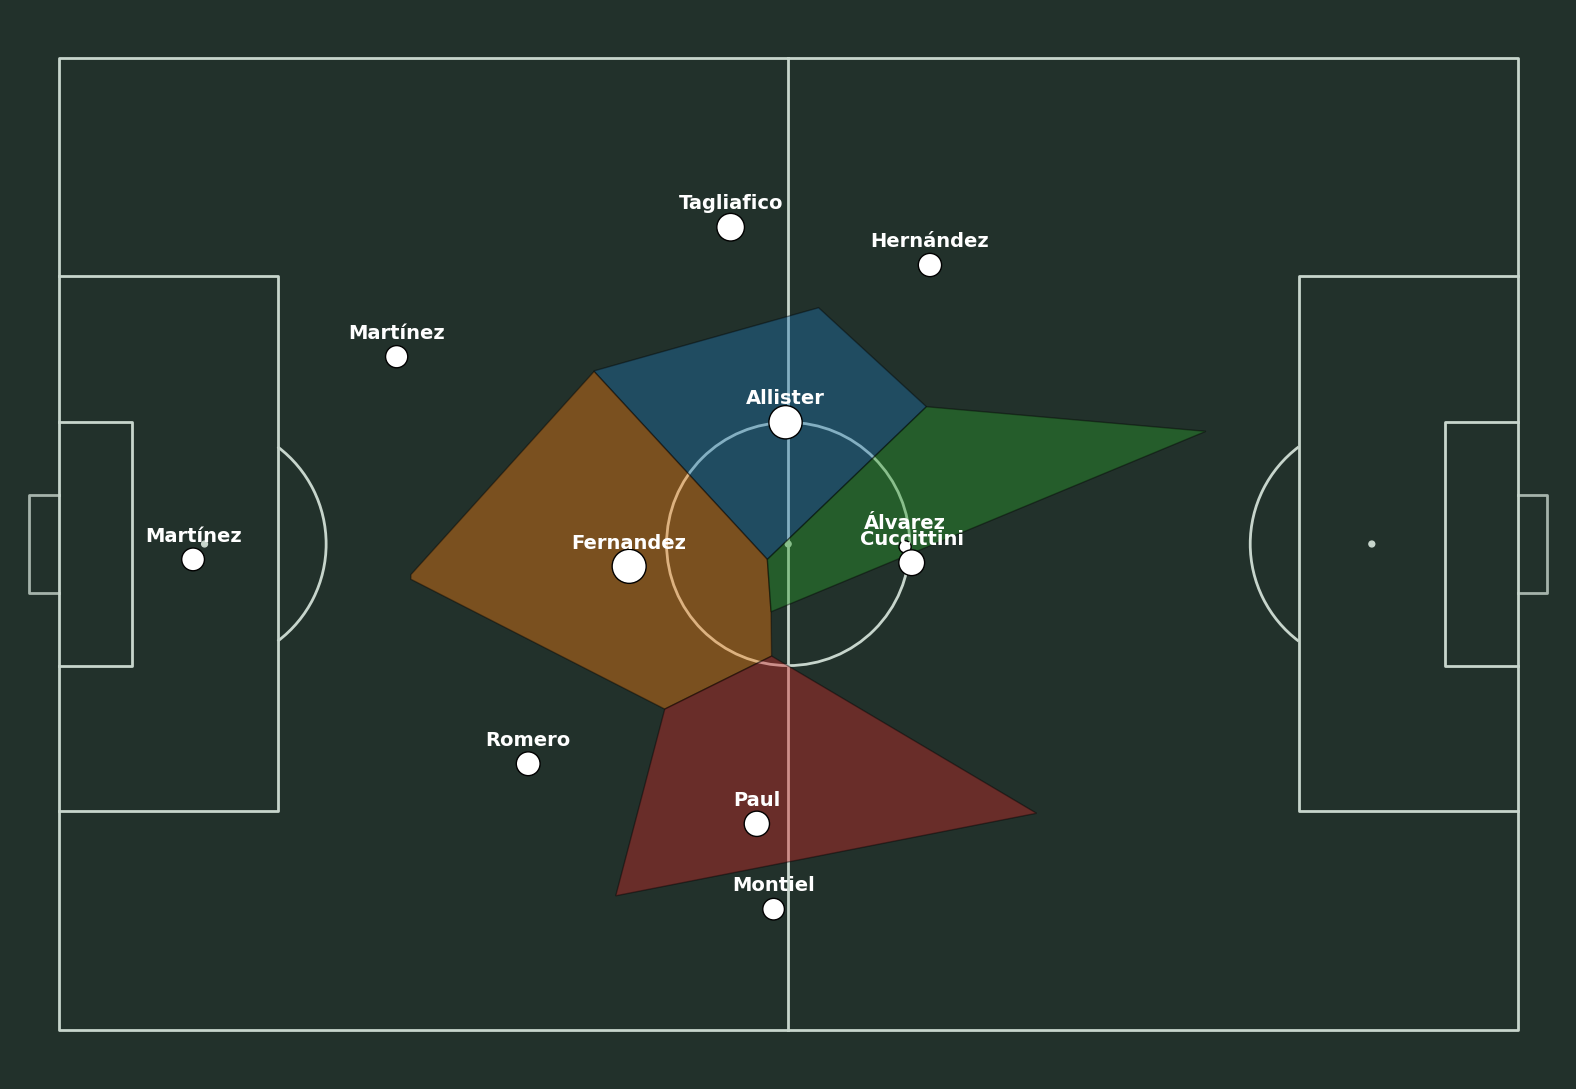

In [119]:
# Definir los límites de la cancha
pitch_xmin, pitch_xmax = 0, 120  # Dimensiones en el eje x
pitch_ymin, pitch_ymax = 0, 80   # Dimensiones en el eje y
bounding_box = [pitch_xmin, pitch_xmax, pitch_ymin, pitch_ymax]

# Crear la cancha con Pitch normal
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc', goal_type='box', goal_alpha=.8)
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#22312b')

# Crear el diagrama de Voronoi
points = averange_location[['x', 'y']].values
vor = Voronoi(points)

# Definir el polígono de los límites del campo
pitch_polygon = Polygon([(pitch_xmin, pitch_ymin), (pitch_xmax, pitch_ymin), (pitch_xmax, pitch_ymax), (pitch_xmin, pitch_ymax)])

def voronoi_finite_polygons_2d(vor, bbox):
    new_regions = []
    
    center = vor.points.mean(axis=0)
    radius = vor.points.ptp().max() * 2

    def create_polygon_from_vertices(vertices):
        polygon = Polygon([vor.vertices[i] for i in vertices])
        if polygon.is_valid:
            return polygon
        return None

    for region_index in vor.point_region:
        region = vor.regions[region_index]
        if not -1 in region:
            # Región finita
            polygon = create_polygon_from_vertices(region)
            if polygon:
                polygon = polygon.intersection(pitch_polygon)
                if not polygon.is_empty and polygon.is_valid:
                    new_regions.append(polygon)
        else:
            # Región infinita
            ridge_vertices = [vor.ridge_vertices[i] for i in range(len(vor.ridge_vertices)) if region_index in vor.ridge_points[i]]
            polygon = []

            for rv in ridge_vertices:
                finite_vertices = [v for v in rv if v >= 0]

                if len(finite_vertices) == 1:
                    v = vor.vertices[finite_vertices[0]]
                    direction = v - center
                    far_point = v + direction / np.linalg.norm(direction) * radius
                    polygon.append(v.tolist())
                    polygon.append(far_point.tolist())

            if len(polygon) > 0:
                polygon = Polygon(polygon)
                if polygon.is_valid:
                    polygon = polygon.intersection(pitch_polygon)
                    if not polygon.is_empty and polygon.is_valid:
                        new_regions.append(polygon)

    return new_regions

# Obtener los polígonos de Voronoi ajustados al campo
regions = voronoi_finite_polygons_2d(vor, bounding_box)

# Plotear las celdas de Voronoi
for region, color in zip(regions, np.random.rand(len(regions), 3)):
    if region is not None and not region.is_empty:
        x, y = region.exterior.xy
        ax.fill(x, y, edgecolor='black', alpha=0.4)

# Plotear los nodos de los jugadores
nodes = pitch.scatter(averange_location.x, averange_location.y, ax=ax, color='white', ec='black', s=averange_location['marker_size'])

# Añadir los nombres de los jugadores
for player, row in averange_location.iterrows():
    player_name = player.split(' ')[-1]
    ax.annotate(player_name, xy=(row.x, row.y - 2), color='white', va='center', ha='center', size=14, weight='bold', zorder=1)

plt.show()

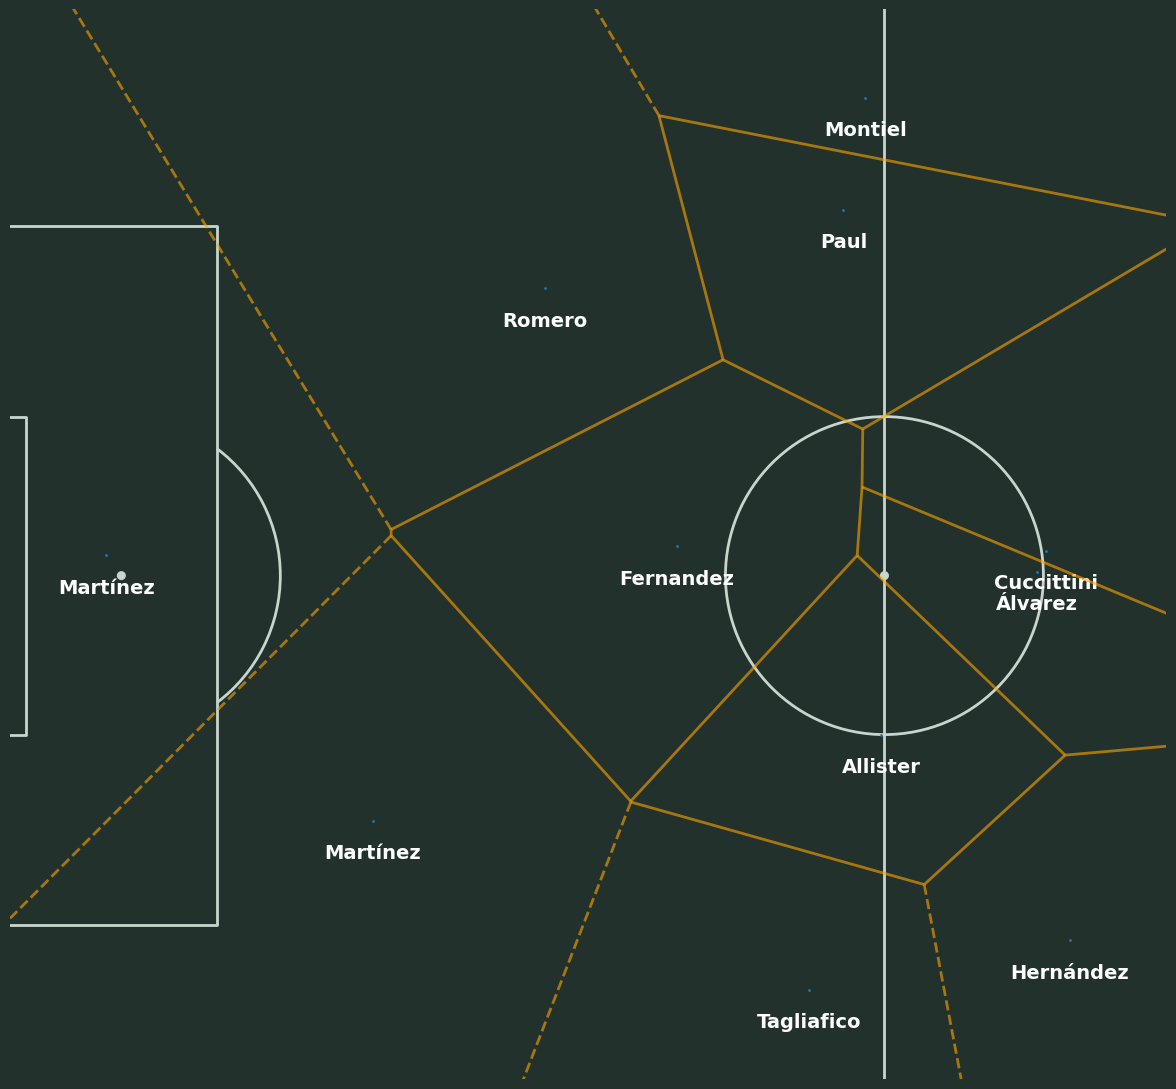

In [120]:
# Crear un array con las coordenadas de los jugadores (x, y)
points = np.array([[row.x, row.y] for _, row in averange_location.iterrows()])

# Calcular el diagrama de Voronoi
vor = Voronoi(points)

# Graficar el campo de fútbol
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc', goal_type='box', goal_alpha=.8)
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#22312b')

# Graficar el diagrama de Voronoi
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='orange', line_width=2, line_alpha=0.6, point_size=2)

# Agregar etiquetas de jugadores
for player, row in averange_location.iterrows():
    player_name = player.split(' ')[-1]
    ax.annotate(player_name, xy=(row.x, row.y - 2), color='white', va='center', ha='center', size=14, weight='bold', zorder=1)

plt.show()

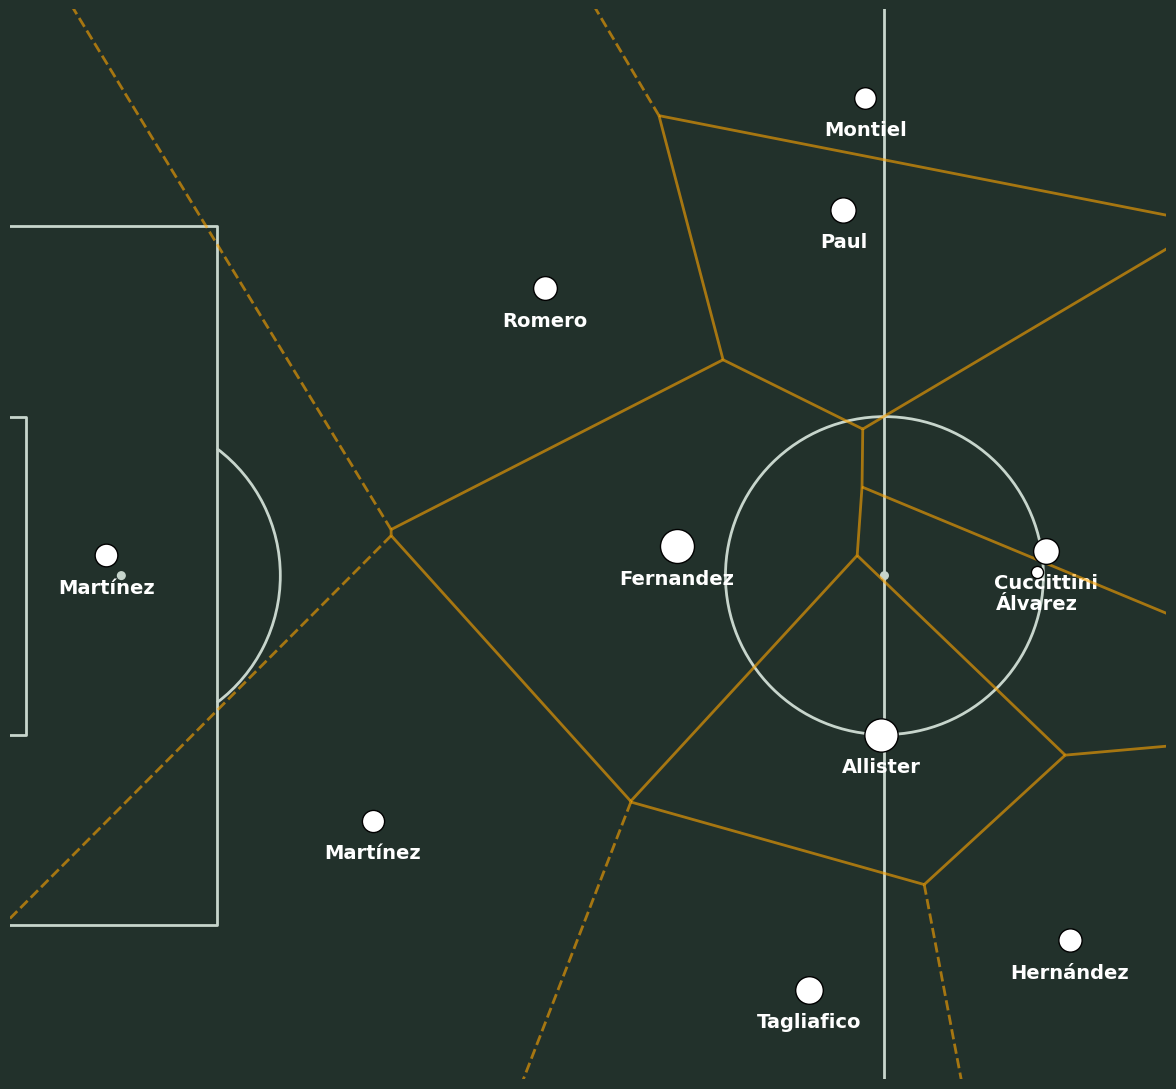

In [121]:
# Crear un array con las coordenadas de los jugadores (x, y)
points = np.array([[row.x, row.y] for _, row in averange_location.iterrows()])

# Calcular el diagrama de Voronoi
vor = Voronoi(points)

# Graficar el campo de fútbol
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc', goal_type='box', goal_alpha=.8)
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#22312b')

# Graficar el diagrama de Voronoi
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='orange', line_width=2, line_alpha=0.6)

# Agregar etiquetas de jugadores y ajustar tamaño de los nodos
for player, row in averange_location.iterrows():
    player_name = player.split(' ')[-1]
    # Ajustar el tamaño de los nodos basado en algún atributo, por ejemplo, 'marker_size'
    node_size = row['marker_size'] if 'marker_size' in row.index else 50  # Default size if 'marker_size' is not present
    ax.scatter(row.x, row.y, color='white', edgecolor='black', s=node_size, zorder=3)
    ax.annotate(player_name, xy=(row.x, row.y - 2), color='white', va='center', ha='center', size=14, weight='bold', zorder=1)

plt.show()